Segundo parcial IA:
- Hernan David Zuluaga Ricardo
- Owen De Jesús Tovar Puello

Aqui configuramos el directorio de trabajo y la ruta de búsqueda para el script de Python requiere el acceso a el archivo de la base de datos en un subdirectorio específico dentro del directorio de trabajo actual.

In [1]:
import os
import sys
PATH = os.getcwd()
DIR_DATA = PATH + '{0}data{0}'.format(os.sep)
sys.path.append(PATH) if PATH not in list(sys.path) else None
DIR_DATA


'C:\\Users\\owent\\OneDrive\\Escritorio\\Parcial IA\\data\\'

# Liberias de Python 

Aqui importamos varias bibliotecas de Python que son necesarias para resolver el parcial y evidentemente para el análisis de datos y el aprendizaje automático. También establecemos la variable filename como la ruta del archivo CSV (Heart Disease efectivo(2).csv) que es nuestra base de datos. 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from collections import Counter
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import classification_report

# ML
from sklearn.model_selection import RandomizedSearchCV,RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree

# File name
filename = DIR_DATA + 'Heart Disease efectivo(2).csv'

# Información de features:

En esta seccion tenemos todas features, su descripcion y algunos de sus posibles valores (se usaron 14)

**age** - edad en años

**sex** - sexo do paciente
    
    0: mujer
 
    1: hombre
    
**cp** - tipo dolor torácica
    
    1: angina típica
    
    2: angina atípica
    
    3: dolor no cardiaco
    
    4: asintomático
    
**trestbps** - presión arterial en reposo

**chol** - colesterol sérico (mg/dl)

**fbs** - azúcar en sangre en ayunas > 120 mg/dl

    0: False
    
    1: True

**restecg** - resultado del electrocardiograma en reposo

    0: normales
    
    1: anomalías ST-T (inversión de la onda T y aumento o disminución de > 0,05 mV )
    
    2: hipertrofia ventricular izquierda probable o definitiva (según criterios de Romhilt-Estes)
    
**thalach** - frecuencia cardíaca máxima alcanzada

**exang** - angina inducida por el ejercicio

    0: no
    
    1: prueba

**oldpeak** - Descenso del segmento ST inducido por el ejercicio en relación con el reposo

**slope** - Pendiente del segmento ST en el ejercicio máximo

**ca** - número de vasos principais colorido por fluoroscopia

**thal** - prueba de esfuerzo con talio
    
    3: normales
    
    6: defecto fijo
    
    7: defecto reversible

**num** - diagnóstico de enfermedades del corazón (diagnóstico angiográfico)
    0: sin enfermedad cardiaca (< 50% de estrechamiento del diámetro)
    1,2,3,4: hay enfermedad cardíaca (> 50% de estrechamiento del diámetro)



# Lectura y analisis de datos:

Utilizamos la biblioteca pandas para leer el archivo CSV que se encuentra en la ruta especificada por la variable filename. 

In [3]:
df = pd.read_csv(filename)

Ahora empezamos el analisis descriptivo de nuestros datos con una tabla de frecuencia a la columna "num" del DataFrame

In [4]:
df.num.value_counts()

num
 1.0      563
-9.0      275
 2.0       41
 162.0      1
 0.0        1
Name: count, dtype: int64

En la siguiente linea, dado que nuestra tarea es determinar si una persona tiene o no una enfermedad cardica, decidimos  reorganizar los valores del DataFrame reduciendo las posibilidades de (0,1,2,3,4), a solo (0 y 1) donde 0 es que no tiene enfermedad cardiaca y 1 en caso de que si la tenga.


In [5]:
# convertir valores >= 0 en 1
df.loc[df.num > 0, 'num'] = 1

Esto lo hicimos considerando que los valores de ("-9") que estan en la columna "num" del DataFrame son 0

In [6]:
# convertir valores != 1 en 0
df.loc[df.num != 1, 'num'] = 0

la siguiente linea de código nos muestra el número de veces que aparece cada valor único en la columna "num" del DataFrame  

In [7]:
df.num.value_counts()

num
1.0    605
0.0    277
Name: count, dtype: int64


Esta linea nos muestra por defecto las primeras cinco filas del DataFrame df. 

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,65,1,4,115,0,0,0,93,1,0.0,2,-9,7,1.0
1,32,1,1,95,0,-9,0,127,0,0.7,1,-9,-9,1.0
2,61,1,4,105,0,-9,0,110,1,1.5,1,-9,-9,1.0
3,50,1,4,145,0,-9,0,139,1,0.7,2,-9,-9,1.0
4,57,1,4,110,0,-9,1,131,1,1.4,1,1,-9,1.0


Esta linea nos muestra las estadísticas descriptivas del DataFrame "df".

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,53.461451,0.791383,3.253968,122.560091,191.010204,-0.767574,0.581633,127.981859,-0.192744,0.173469,-1.989796,-5.984127,-2.543084,0.685941
std,9.427734,0.406550,0.927026,39.830334,116.888156,2.799252,0.921814,43.434867,2.321306,2.731175,5.162612,4.534366,7.119609,0.464403
min,28.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,160.000000,0.000000,0.000000,114.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,222.000000,0.000000,0.000000,136.000000,0.000000,0.200000,1.000000,-9.000000,-9.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,155.000000,1.000000,1.500000,2.000000,0.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,9.000000,7.000000,1.000000


Esta funcion muestra información del DataFrame (el número total de filas, columnas, nombre de cada columna, el tipo de datos de cada columna y el número de valores no nulos en cada columna)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       882 non-null    int64  
 1   sex       882 non-null    int64  
 2   cp        882 non-null    int64  
 3   trestbps  882 non-null    int64  
 4   chol      882 non-null    int64  
 5   fbs       882 non-null    int64  
 6   restecg   882 non-null    int64  
 7   thalach   882 non-null    int64  
 8   exang     882 non-null    int64  
 9   oldpeak   882 non-null    float64
 10  slope     882 non-null    int64  
 11  ca        882 non-null    int64  
 12  thal      882 non-null    int64  
 13  num       882 non-null    float64
dtypes: float64(2), int64(12)
memory usage: 96.6 KB


# Correlacion entre Features
Este código genera un mapa de clústeres para visualizar la correlación entre las diferentes características o features del DataFrame

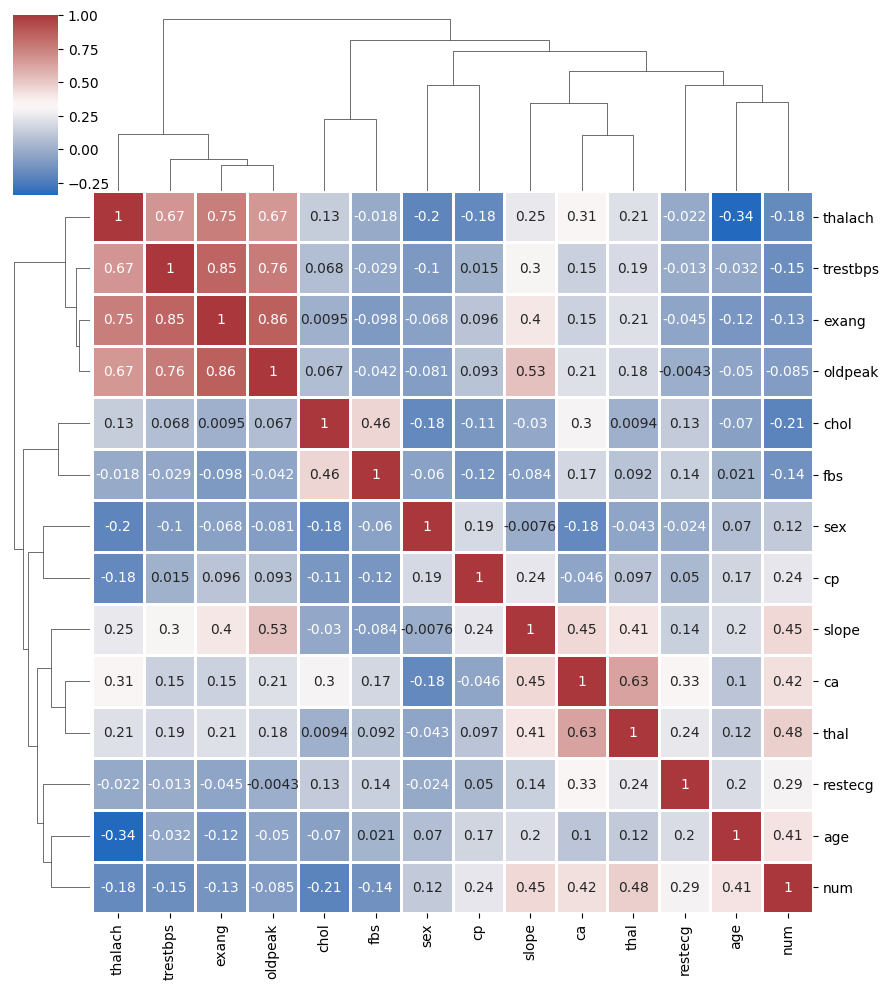

In [11]:
sns.clustermap(df.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()

Este código genera un gráfico de dispersión de pares para visualizar las relaciones entre las diferentes variables del DataFrame

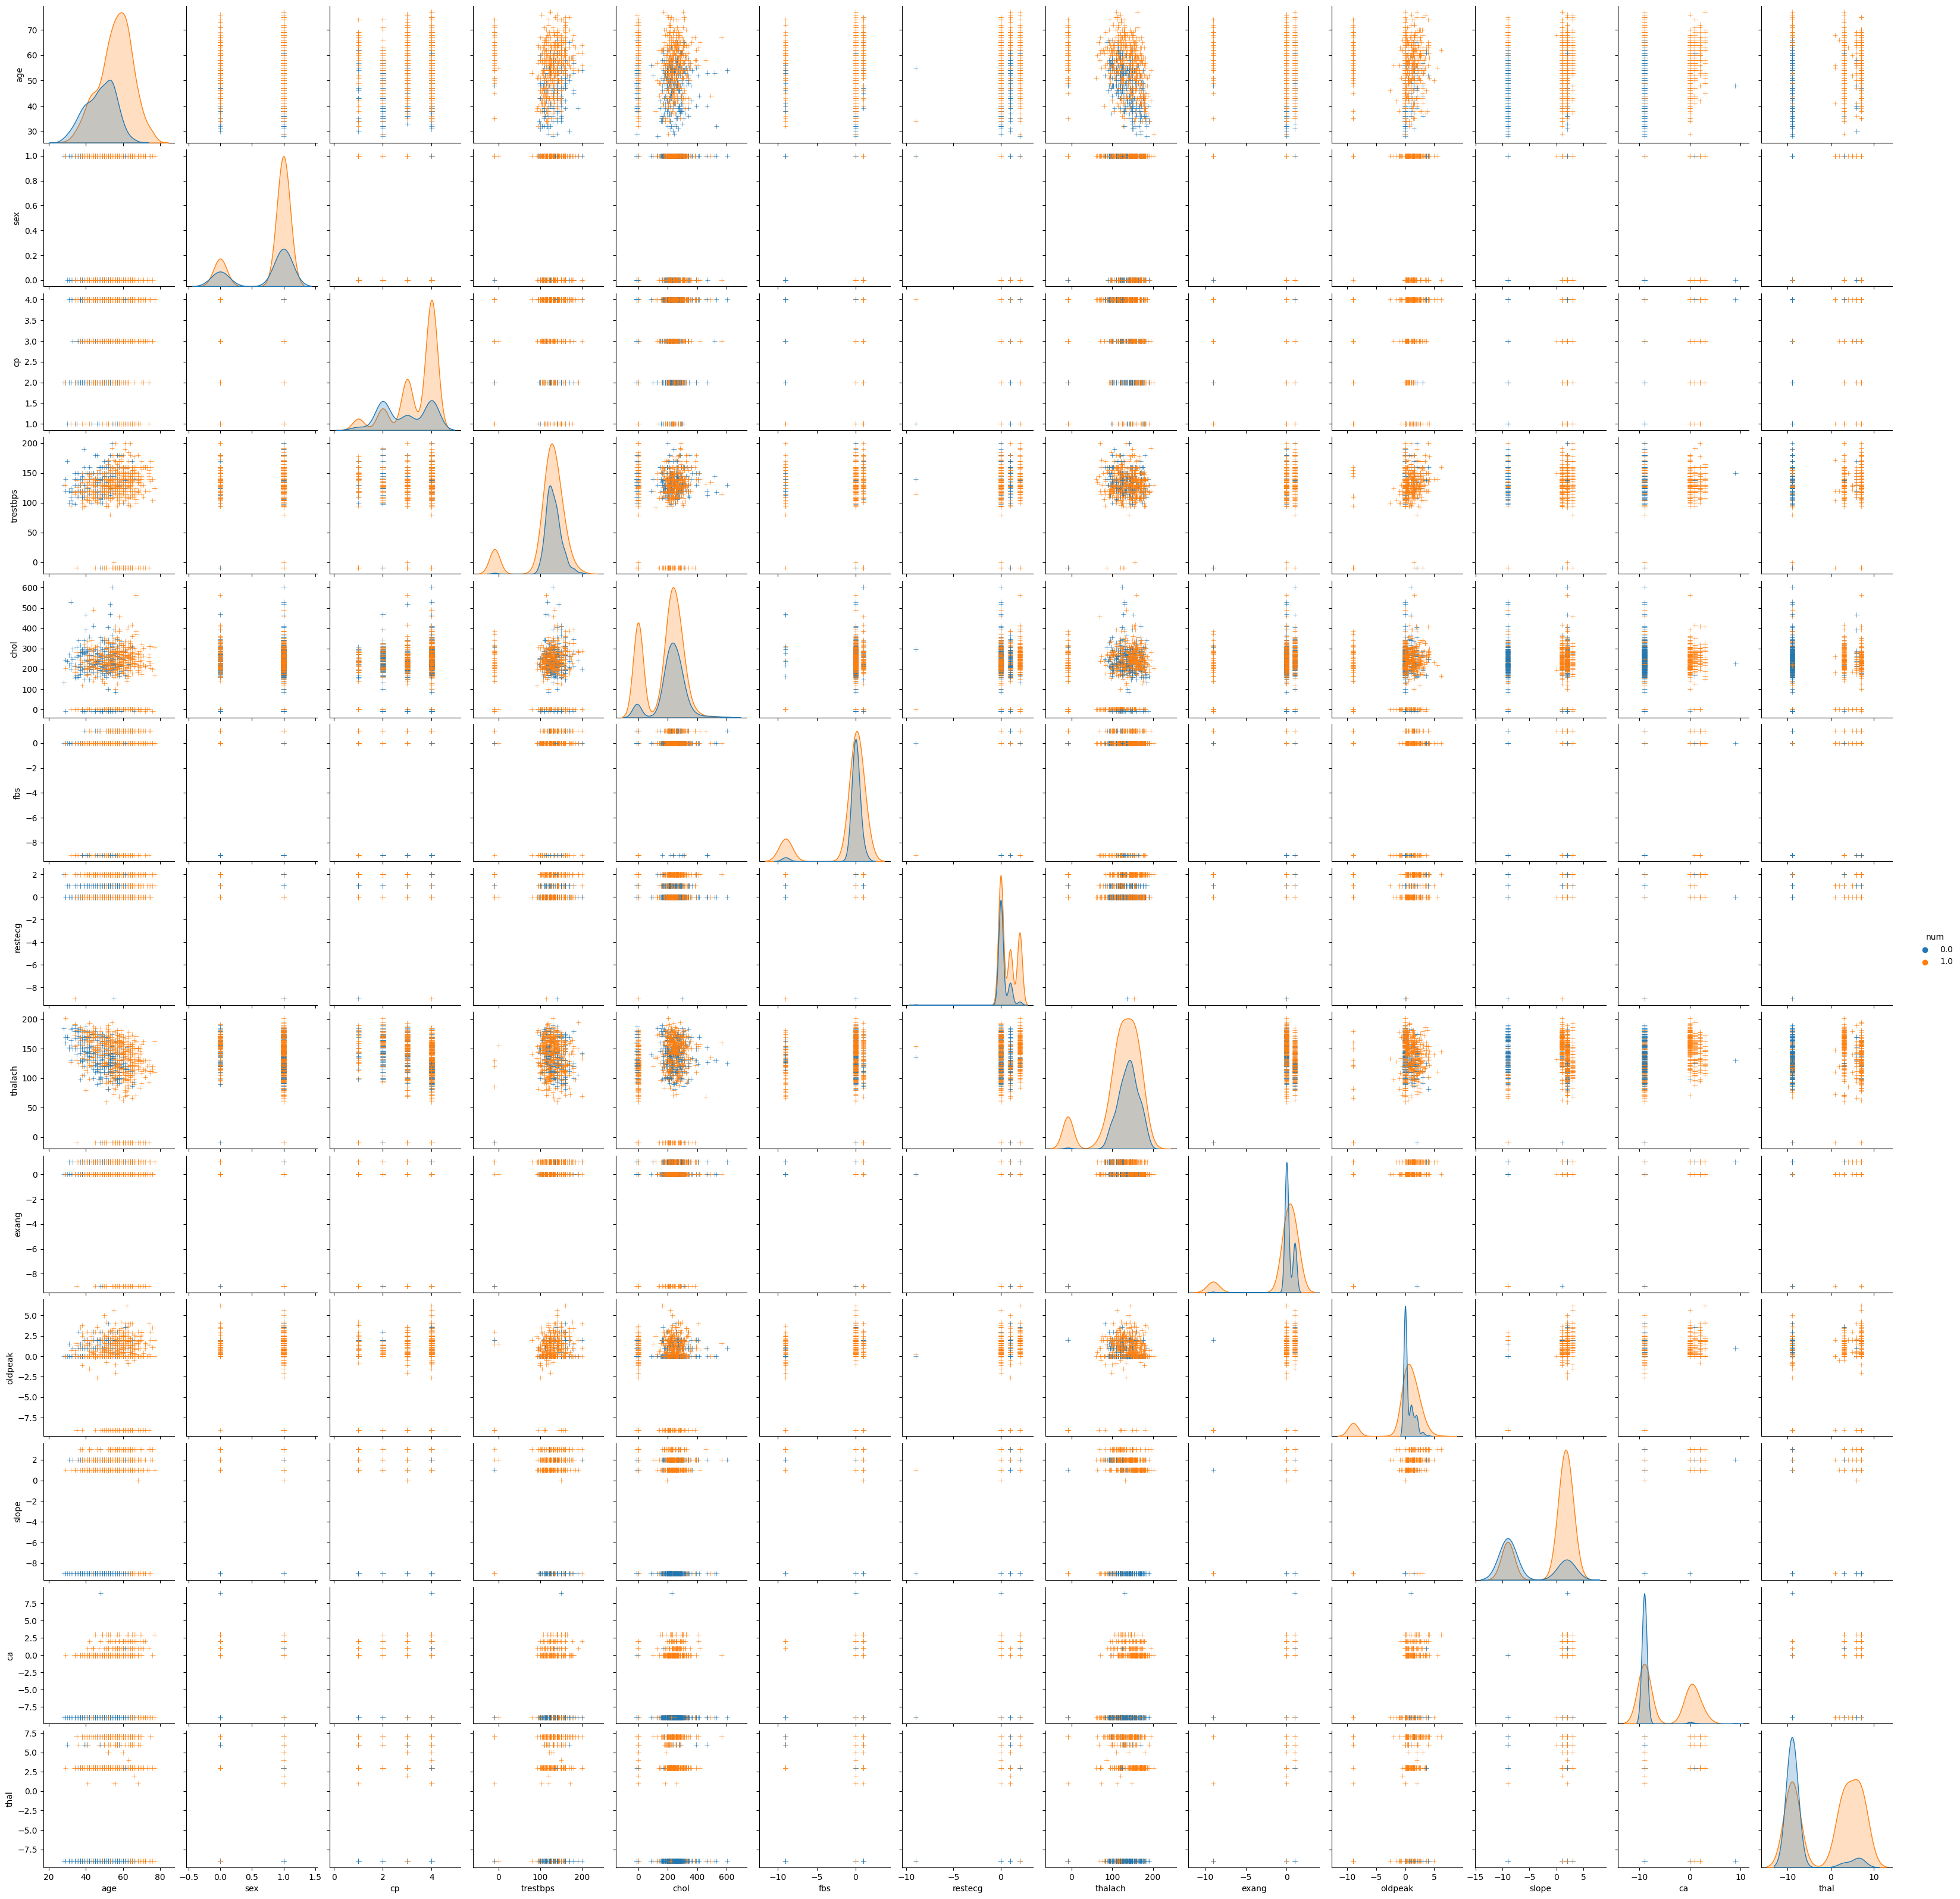

In [12]:
g = sns.pairplot(df, hue='num', markers='+')
plt.show()

# Preprocesamiento: problema de valores perdidos

Este código genera una matriz de valores faltantes para visualizar la distribución de valores faltantes en el DataFrame 

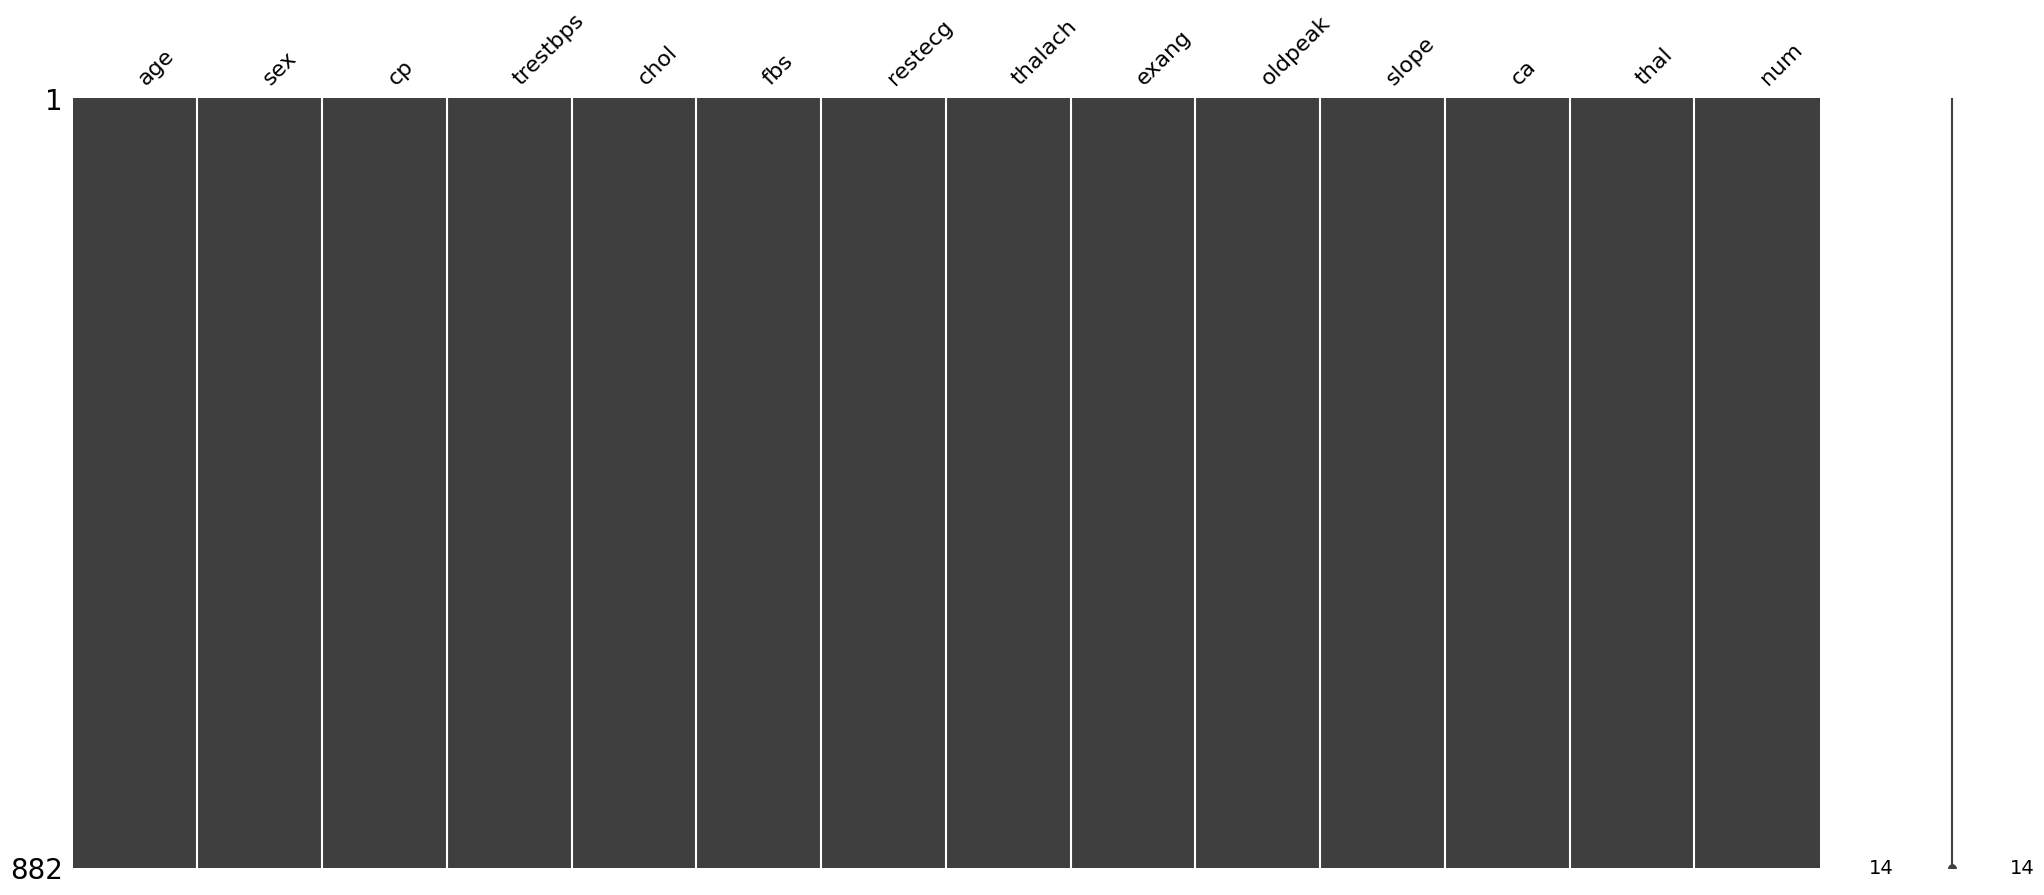

In [13]:
msno.matrix(df)
plt.show()

Este código nos devuelve el número de valores faltantes en cada variable del DataFrame, en la primera ejecucion que realizamos nos mostro que faltaba 1 dato en la columna "num", lo cual solucionamos en la siguiente celda

In [14]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

En esta linea solucionamos lo que plantemamos en la celda anterior, este código reemplaza los valores nulos en la columna "num" del DataFrame con el valor medio de la columna utilizando la función "fillna()" de pandas.

In [15]:
# reemplazar el valor faltante con la media de las características
df["num"].fillna(value = df["num"].mean(), inplace =True)

Acá volvemos a ejecutar la funcion "isnull()" para hacer la comprobacion de que se reemplazaron correctamente los datos faltantes por la media de ellos.

In [16]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

# Preprocesamiento de los datos

Aqui creamos dos variables, '**x**' y '**y**':

- La variable '**x**' se asigna como un array, para que este contenga los valores del DataFrame excluyendo la columna "num".

- La variable '**y**' se asigna como un array que contenga los valores de la columna "num" del DataFrame. 

In [17]:
x = df.drop("num", axis=1).values
y = df["num"].values

Con este código se crea es una lista ordenada de tuplas en la que cada tupla contiene un valor único en '**y**' y el número de ocurrencias de ese valor. Esto para comprender la distribución de clases en el conjunto de datos.

la salida, nos muestra que el conjunto de datos tiene 277 instancias de la clase "0" y 605 instancias de la clase "1". Es una distribución desequilibrada de clases, ya que hay más instancias de la clase "1" que de la clase "0".

In [18]:
sorted(Counter(y).items())

[(0.0, 277), (1.0, 605)]

Aqui dividimos el conjunto de datos en dos conjuntos separados llamados conjunto de entrenamiento (train) y conjunto de prueba (test) utilizando la función train_test_split, luego  imprimimos las formas (número de filas y columnas) de los conjuntos de datos resultantes.

In [19]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (617, 13)
x_test (265, 13)
y_train (617,)
y_test (265,)


Aqui contamos el número de ocurrencias de cada clase en el conjunto de entrenamiento y_train.

En este caso, la salida nos muestra que hay 199 muestras pertenecientes a la clase 0.0 (ausencia de enfermedad cardíaca) y 418 muestras pertenecientes a la clase 1.0 (presencia de enfermedad cardíaca) en el conjunto de entrenamiento. Esto indica que el conjunto de entrenamiento no está perfectamente equilibrado, estaria sesgado a la clase 1.0 ya que hay más muestras de esta clase que de la clase 0.0. 

In [20]:
# Train
sorted(Counter(y_train).items())

[(0.0, 199), (1.0, 418)]

Aqui estariamos haciendo lo mismo que en la linea pasada pero esta vez con y_test.

y la salida muestra que hay 78 muestras pertenecientes a la clase 0.0 (ausencia de enfermedad cardíaca) y 187 muestras pertenecientes a la clase 1.0 (presencia de enfermedad cardíaca) en el conjunto de prueba. Esto indica que el conjunto de prueba tampoco está perfectamente equilibrado, ya que hay más muestras de la clase 1.0 que de la clase 0.0

In [21]:
# Test for validation
sorted(Counter(y_test).items())

[(0.0, 78), (1.0, 187)]

# Sobremuestreo

En estas líneas de código usamos la técnica de sobremuestreo aleatorio (RandomOverSampler) para equilibrar las clases en el conjunto de entrenamiento (x_train e y_train), duplicando aleatoriamente las muestras de la clase minoritaria para que haya una cantidad similar de muestras para ambas clases.

In [22]:
ros_train = RandomOverSampler(random_state=1000)
xx_train, yy_train  = ros_train.fit_resample(x_train, y_train)

Ahora contamos el número de muestras en cada clase del conjunto de entrenamiento balanceado (yy_train). 

La salida nos deja ver el conteo de muestras en orden ascendente para las dos clases: (0.0, 418) y (1.0, 418). Esto indica que después del sobremuestreo aleatorio, ambas clases tienen la misma cantidad de muestras (418 cada una), lo que significa que el conjunto de entrenamiento está equilibrado.

In [23]:
# Train
sorted(Counter(yy_train).items())

[(0.0, 418), (1.0, 418)]

En estas líneas de código volvemos a usar la técnica de sobremuestreo aleatorio (RandomOverSampler) para equilibrar las clases en el conjunto de prueba (x_test e y_test).

In [24]:
ros_test = RandomOverSampler(random_state=1000)
xx_test, yy_test = ros_test.fit_resample(x_test, y_test)

Contamos la cantidad de muestras para cada clase en el conjunto de datos de prueba después de aplicar la técnica de sobremuestreo aleatorio.

En este caso, la salida: (0.0, 187), (1.0, 187) nos muestra que ahora tenemos 187 muestras para cada clase, lo que indica que el conjunto de datos está equilibrado y se puede utilizar para entrenar y probar nuestro modelo de aprendizaje automático sin preocuparnos por el sesgo.

In [25]:
# Test
sorted(Counter(yy_test).items())

[(0.0, 187), (1.0, 187)]

Este código realiza la normalización min-max en el conjunto de datos de entrenamiento y prueba "xx_train" y "xx_test" respectivamente. 



In [26]:
# min-max normalization
x_train_max =np.max(xx_train)
x_train_min =np.min(xx_train)
xx_train= (xx_train - x_train_min)/(x_train_max-x_train_min)
xx_test= (xx_test - x_train_min)/(x_train_max-x_train_min)

# Modelling

# Overfitting

In [27]:
k_fold = ShuffleSplit(n_splits=10, test_size=0.30, random_state=42)

En esta línea de código se está creando una lista de tuplas, donde cada tupla contiene el nombre de un modelo de aprendizaje automático y su correspondiente instancia de modelo. En este caso, la lista solo contiene una tupla con el nombre "Logistic Regression" y su correspondiente instancia de modelo de regresión logística, que está configurada para utilizar el solver "liblinear".

In [28]:
models = [("Logistic Regression", LogisticRegression(solver="liblinear"))]

Este código ejecuta un bucle que recorre cada modelo de la lista de modelos y evalúa su rendimiento mediante validación cruzada. Para cada modelo, se calculan la precisión y la exactitud media en todos los pliegues. Estos resultados se almacenan en una lista llamada finalResults que se utiliza para imprimir un resumen de rendimiento para cada modelo.

La salida nos muestra que el modelo logístico tuvo una precisión promedio del 70% y una exactitud promedio del 64%. La precisión se refiere a la fracción de verdaderos positivos entre todos los positivos predichos, mientras que la exactitud se refiere a la fracción de muestras clasificadas correctamente.

In [29]:
finalResults = []
for name, model in models:
    accuracies = []
    precisions = []
    for train_index, test_index in k_fold.split(xx_train, yy_train):
        data_train = xx_train[train_index]
        target_train = yy_train[train_index]

        data_test = xx_train[test_index]
        target_test = yy_train[test_index]

        model.fit(data_train, target_train)
        predict = model.predict(data_test)
        # Accuracy
        accuracy = accuracy_score(target_test, predict)
        accuracies.append(accuracy)
        # Precision
        precision = precision_score(target_test, predict, average='binary')
        precisions.append(precision)
       
    finalResults.append({'name':name, 'accuracy': round(np.mean(accuracies), 2), 'precision': round(np.mean(precisions), 2)})
finalResults


[{'name': 'Logistic Regression', 'accuracy': 0.64, 'precision': 0.7}]

La línea de código convierte la lista de diccionarios finalResults en un objeto de pandas DataFrame. 

El resultado muestra un DataFrame con tres columnas: 'name', 'accuracy', y 'precision'. Cada fila representa un modelo en la lista models, con los valores de precisión y exactitud promedio de las 10 validaciones cruzadas. En este caso, solo se ha evaluado un modelo, la Regresión Logística, y la precisión promedio es de 0.7 y la exactitud promedio es de 0.64.

In [30]:
df_result = pd.DataFrame.from_dict(finalResults)
df_result

,name,accuracy,precision
0,Logistic Regression,0.64,0.7


Aqui se están realizando las predicciones en el conjunto de prueba xx_test utilizando el modelo model de alteración en el conjunto de entrenamiento xx_train. 

Luego se está construyendo la matriz de confusión comparando los valores reales yy_test y los valores predichos y_predict por el modelo. 

La matriz de confusión ayuda a evaluar la precisión del modelo. Cada fila representa las instancias en una clase real mientras que cada columna representa las instancias en una clase predicha.

In [31]:
y_predict = model.predict(xx_test)
cm = confusion_matrix(yy_test, y_predict)

Aqui se crea un mapa de calor usando la matriz de confusión cm previamente calculada. 

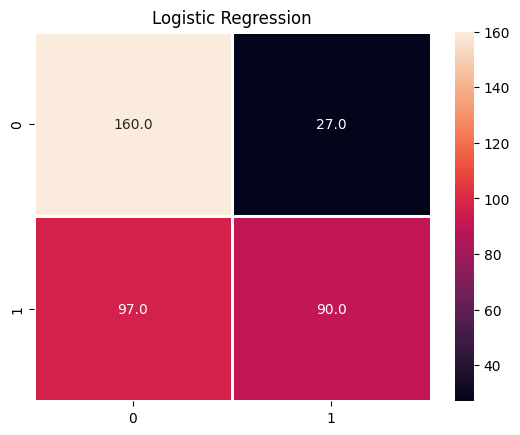

In [32]:
plt.figure()
sns.heatmap(cm , annot =True, linewidth=0.8,fmt=".1f")
plt.title("Logistic Regression")
plt.show()

La matriz de confusión representa la cantidad de verdaderos positivos, falsos positivos, falsos negativos y verdaderos negativos que tiene un modelo de clasificación. En este caso, los valores de la matriz de confusión indican lo siguiente:

El subcuadro en la posición 0,0 (esquina superior izquierda) representa los verdaderos negativos, es decir, los casos en los que el modelo predijo correctamente que la persona no tenía enfermedad cardíaca. En este caso, el valor es 160, lo que significa que el modelo predijo correctamente 160 casos negativos.

El subcuadro en la posición 0,1 (parte superior derecha) representa los falsos positivos, es decir, los casos en los que el modelo predijo que una persona tenía enfermedad cardíaca pero en realidad no la tenía. En este caso, el valor es 27, lo que significa que el modelo predijo incorrectamente que 27 personas tenían la enfermedad cuando en realidad no la tenían.

El subcuadro en la posición 1,0 (parte inferior izquierda) representa los falsos negativos, es decir, los casos en los que el modelo predijo que una persona no tenía enfermedad cardíaca pero en realidad la tenía. En este caso, el valor es 97, lo que significa que el modelo predijo incorrectamente que 97 personas no tenían la enfermedad cuando en realidad sí la tenían.

El subcuadro en la posición 1,1 (esquina inferior derecha) representa los verdaderos positivos, es decir, los casos en los que el modelo predijo correctamente que una persona tenía enfermedad cardíaca. En este caso, el valor es 90, lo que significa que el modelo predijo correctamente que 90 personas tenían la enfermedad.

En general, la diagonal principal (de la esquina superior izquierda a la inferior derecha) de la matriz de confusión representa los casos en los que el modelo predijo correctamente, mientras que las celdas fuera de la diagonal representan los casos en los que el modelo predijo incorrectamente. En este caso, el modelo parece tener una precisión (proporción de verdaderos positivos entre verdaderos positivos y falsos positivos) de alrededor del 77%, pero una tasa de falsos negativos (proporción de falsos negativos entre falsos negativos y verdaderos negativos) de alrededor del 38%.

# Reporte clasificacion 


para finalizar, la función classification_report nos muestra un informe detallado del desempeño del modelo en la clasificación de las instancias de prueba. La salida incluye las métricas de precisión, recall y f1-score para cada clase y para el conjunto de datos en general.

En este caso, la salida indica que el modelo tiene una: 
- Precisión del 62% para la clase 0 y del 77% para la clase 1. 
- El recall es del 86% para la clase 0 y del 48% para la clase 1. 
- El f1-score es del 72% para la clase 0 y del 59% para la clase 1.

Además, la precisión, recall y f1-score se presentan para cada clase, así como la precisión, recall y f1-score ponderados y promediados. La precisión ponderada es del 70% y el recall ponderado es del 67%, lo que indica que el modelo tiene un desempeño promedio en la clasificación de las instancias de prueba.

In [33]:
print(classification_report(yy_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.62      0.86      0.72       187
         1.0       0.77      0.48      0.59       187

    accuracy                           0.67       374
   macro avg       0.70      0.67      0.66       374
weighted avg       0.70      0.67      0.66       374



El solver utilizado en la regresión logística (en este caso "liblinear") afecta a la forma en que el modelo encuentra los valores óptimos de los coeficientes que se utilizan para realizar las predicciones. En este caso de "liblinear",consideramos que es un buen solver para conjuntos de datos pequeños o medianos y proporciona una solución rápida y precisa para la regresión logística como el que usamos.